### Scaling Preprocessing Task

표정 분류  

**`flow_from_dataframe()`을 사용한다.**

In [6]:
import pandas as pd

train_generator = ImageDataGenerator()
validation_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()

root = './datasets/face/'

train_flow = train_generator.flow_from_directory(root + 'train/', target_size=(150, 150), batch_size=32, class_mode='categorical')
validation_flow = validation_generator.flow_from_directory(root + 'validation/', target_size=(150, 150), batch_size=32, class_mode='categorical')
test_flow = test_generator.flow_from_directory(root + 'test/', target_size=(150, 150), batch_size=32, class_mode='categorical')

train_target_name = {v: k for k, v in train_flow.class_indices.items()}
validation_target_name = {v: k for k, v in validation_flow.class_indices.items()}
test_target_name = {v: k for k, v in test_flow.class_indices.items()}

train_target_names = []
for target in train_flow.classes:
    train_target_names.append(train_target_name[target])

validation_target_names = []
for target in validation_flow.classes:
    validation_target_names.append(validation_target_name[target])

test_target_names = []
for target in test_flow.classes:
    test_target_names.append(test_target_name[target])

train_df = pd.DataFrame({'file_paths': train_flow.filepaths, 'target_names': train_target_names, 'targets': train_flow.classes})
train_df.loc[:, 'file_paths'] = train_df.file_paths.apply(lambda x: x.replace('\\', '/'))

validation_df = pd.DataFrame({'file_paths': validation_flow.filepaths, 'target_names': validation_target_names, 'targets': validation_flow.classes})
validation_df.loc[:, 'file_paths'] = validation_df.file_paths.apply(lambda x: x.replace('\\', '/'))

test_df = pd.DataFrame({'file_paths': test_flow.filepaths, 'target_names': test_target_names, 'targets': test_flow.classes})
test_df.loc[:, 'file_paths'] = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))

display(train_df.head())
display(validation_df.head())
display(test_df.head())

Found 22967 images belonging to 7 classes.
Found 5742 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


,file_paths,target_names,targets
0,./datasets/face/train/angry/angry1.png,angry,0
1,./datasets/face/train/angry/angry10.png,angry,0
2,./datasets/face/train/angry/angry100.png,angry,0
3,./datasets/face/train/angry/angry1000.png,angry,0
4,./datasets/face/train/angry/angry1001.png,angry,0


,file_paths,target_names,targets
0,./datasets/face/validation/angry/angry1005.png,angry,0
1,./datasets/face/validation/angry/angry1008.png,angry,0
2,./datasets/face/validation/angry/angry1013.png,angry,0
3,./datasets/face/validation/angry/angry1021.png,angry,0
4,./datasets/face/validation/angry/angry1024.png,angry,0


,file_paths,target_names,targets
0,./datasets/face/test/angry/angry1.png,angry,0
1,./datasets/face/test/angry/angry10.png,angry,0
2,./datasets/face/test/angry/angry100.png,angry,0
3,./datasets/face/test/angry/angry101.png,angry,0
4,./datasets/face/test/angry/angry102.png,angry,0


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 64

def preprocessing_scaling_for_train(image, mode='tf'):
    aug = A.HorizontalFlip(p=0.5)
    image = aug(image=image)['image']
    
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf': # -1 ~ 1 scale
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch': # z-score scale
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

# flow_from_dataframe에서 y_col에 들어갈 타겟 데이터는 문자열 타입만 가능하다.
train_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling_for_train)
validation_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
test_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)

train_flow = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names', 
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)
validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, 
                                                      x_col='file_paths', 
                                                      y_col='target_names',
                                                      target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                      class_mode='categorical')
test_flow = test_generator.flow_from_dataframe(dataframe=test_df, 
                                                      x_col='file_paths', 
                                                      y_col='target_names',
                                                      target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                      class_mode='categorical')

print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 22967 validated image filenames belonging to 7 classes.
Found 5742 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception

def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    x = model.output

    # 분류기
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(50, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(7, activation='softmax', name='output')(x)

    model = Model(inputs=input_tensor, outputs=output)

    if verbose:
        model.summary()
    else:
        pass

    return model

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

model = create_model(model_name='xception', verbose=True)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 31, 31, 32)        │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 31, 31, 32)        │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 31, 31, 32)        │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 29, 29, 64)        │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 29, 29, 64)        │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 29, 29, 64)        │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 29, 29, 128)       │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 29, 29, 128)       │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 29, 29, 128)       │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 29, 29, 128)       │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 15, 15, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 15, 15, 128)       │               

 Total params: 20,964,287 (79.97 MB)

 Trainable params: 20,909,759 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)


In [16]:
import gc

gc.collect()

1270

In [17]:
N_EPOCHS = 10

history = model.fit(train_flow, 
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_flow, 
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


718/718 ━━━━━━━━━━━━━━━━━━━━ 480s 642ms/step - acc: 0.2960 - loss: 1.7523 - val_acc: 0.4582 - val_loss: 1.3905 - learning_rate: 0.0010
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 401s 558ms/step - acc: 0.4662 - loss: 1.4168 - val_acc: 0.4920 - val_loss: 1.3170 - learning_rate: 0.0010
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 379s 528ms/step - acc: 0.5193 - loss: 1.2932 - val_acc: 0.5300 - val_loss: 1.2706 - learning_rate: 0.0010
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 407s 567ms/step - acc: 0.5523 - loss: 1.2174 - val_acc: 0.5024 - val_loss: 1.2684 - learning_rate: 0.0010
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 420s 585ms/step - acc: 0.5680 - loss: 1.1592 - val_acc: 0.5414 - val_loss: 1.2001 - learning_rate: 0.0010
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 421s 587ms/step - acc: 0.5998 - loss: 1.0935 - val_acc: 0.5474 - val_loss: 1.2860 - learning_rate: 0.0010
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 436s 607ms/step - acc: 0.6209 - loss: 1.0433 - val_acc: 0.5951 - val_loss: 1.0864 - learning_ra

In [18]:
model.evaluate(test_flow)

225/225 ━━━━━━━━━━━━━━━━━━━━ 60s 266ms/step - acc: 0.5966 - loss: 1.1873


[1.215606927871704, 0.5869323015213013]

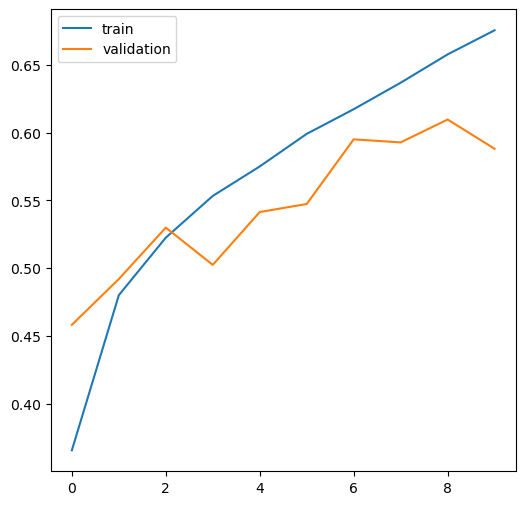

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()

show_history(history)